# Execute accelerator with Image on Alveo U250
-----------------------------------------------------------------------

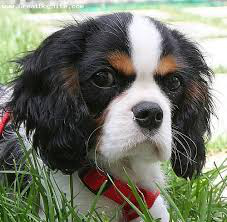

In [1]:
from PIL import Image
from IPython.display import display

img = Image.open("king_charles.jpg")
display(img)

## Import Driver
-------------------------------

In [2]:
from driver import FINNAccelDriver

/home/jakobap/miniconda3/envs/vitis_test/lib/python3.6/site-packages/setuptools/distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "


## Execute Accelerator
------------------------------

### Instantiation
* batch size, bitfile and platform are specified

In [3]:
batch_size = 1
bitfile = "a.xclbin"
platform = "alveo"

In [4]:
finnDriver = FINNAccelDriver(batch_size, bitfile, platform)

### Prepare and pass input to accelerator

In [5]:
import numpy as np

ibuf_normal = np.load("end2end_mobilenet_input.npy")
ibuf_normal = ibuf_normal.transpose(0, 2, 3, 1).astype(np.float32)
ibuf_folded = finnDriver.fold_input(ibuf_normal)
ibuf_packed = finnDriver.pack_input(ibuf_folded)
finnDriver.copy_input_data_to_device(ibuf_packed)

### Execute driver

In [6]:
finnDriver.execute()

### Get output data and print result

In [7]:
obuf_folded = finnDriver.unpack_output(finnDriver.obuf_packed_device)
obuf_normal = finnDriver.unfold_output(obuf_folded)
print("result execution: " + str(obuf_normal.flatten()))

result execution: [156. 152. 157. 219. 162.]


### Comparison with ImageNet classes

In [8]:
print("Top5: ")
imagenet_dict = {156 : "Blenheim spaniel", 152 : "Japanese spaniel", 157: "papillon", 219: "cocker spaniel, English cocker spaniel, cocker" , 162: "bloodhound, sleuthhound"}
for index in obuf_normal.flatten():
    print(imagenet_dict[index])

Top5: 
Blenheim spaniel
Japanese spaniel
papillon
cocker spaniel, English cocker spaniel, cocker
bloodhound, sleuthhound
